# Defining initial modules

In [26]:
import pandas
import os
import torch

import albumentations 
import matplotlib.pyplot as plt 

import seaborn as sns
from PIL import Image
import numpy

import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Defining data urls

In [27]:
train_images_path = "../data/train/train/images/"
train_image_masks_path = "../data/train/train/masks/"

# Loading small batch of images and masks for initial analysis

In [36]:
def load_files(file_path, number_of_files: int = None):
    """
    Function loads files from given 'file_path' source
    Args:
        - file_path - path, pointing to the files directory
        - number_of_files - respective number of files to load
    """
    batch = []
    for path in os.listdir(file_path):
        try:
            full_url = os.path.join(file_path, path)
            ext = path.split(".")[-1]
            if ext in ('jpeg', 'png', 'jpg'):
                img_file = Image.open(full_url)
                img_file = numpy.asarray(img_file).astype(numpy.uint8)
                batch.append(img_file)
        except(FileNotFoundError):
            print('file not found: %s' % full_url)
    return batch

In [37]:
%%time

loaded_imgs = load_files(file_path=train_images_path, number_of_files=5)

CPU times: user 23.5 s, sys: 1.74 s, total: 25.3 s
Wall time: 25.7 s


In [38]:
%%time
loaded_masks = load_files(file_path=train_image_masks_path, number_of_files=5)

CPU times: user 3.88 s, sys: 311 ms, total: 4.19 s
Wall time: 4.21 s


# Visualizing images and masks

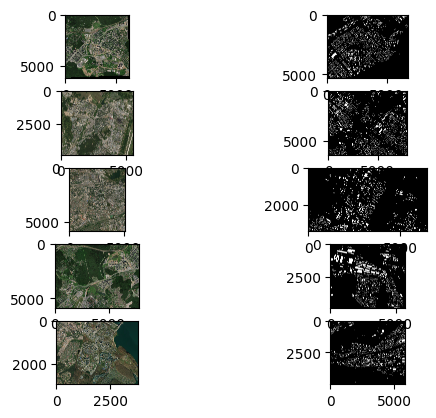

<Figure size 3000x3000 with 0 Axes>

In [45]:
fg, ax = plt.subplots(ncols=2, nrows=5)
plt.figure(figsize=(30, 30))

for idx in range(5):
    ax[idx,0].imshow(loaded_imgs[idx])
    ax[idx,1].imshow(loaded_masks[idx], cmap='gray')

# Defining Augmentation Pipeline

###### Augmentation pipeline predominantely consists of geometrical and structure-based transformations

###### Main idea: we are not going to use any color-based transformations,
###### because the input shape to segmentation models consists of 1 channel (image is entirely grayscaled)
###### that's why in this case scenario, they would not be really helpful.

In [ ]:
class DynamicResiza

In [ ]:
train_transformations = albumentations.Compose(
    [
        # geometrical augmentations
        albumentations.OneOf([
            albumentations.HorizontalFlip(),
            albumentations.VerticalFlip(),
            albumentations.Rotate(degrees=15),
        ]),

        # cropping augmentations
        albumentations.Crop(),
        
        # padding augmentations
        albumentations.PadIfNeeded(
            min_height=INPUT_IMAGE_HEIGHT, 
            min_width=INPUT_IMAGE_WIDTH
        ),
        # converting image to grayscale
        albumentations.ToGray(always_apply=True),
    ]
)

validation_transformations = albumentations.Compose(
    [

    ]
)

# Defining Dataset

In [ ]:
%%time

from torch.utils import data

class SegmentationDataset(data.Dataset):

    """
    Implementation of the dataset object
    for storing and managing segmentation data

    Parameters:
    -----------

    imgs (list) - list of grayscaled images
    """
    def __init__(self, imgs, masks, transformations=None):
        self.imgs = imgs
        self.masks = masks
        self.transformations = transformations
        
    def __len__(self):
        return len(self.imgs)

    def augment(self):
        """
        Functions augments images using provided
        'transformations'

        NOTE:
            after applying the transformations
            both image and mask are going to be modified
        """
        for idx in range(len(self.imgs)):
            content = self.transformations(container_string)
            self.imgs[idx] = content['image']
            self.masks[idx] = content['mask']

    def __getitem__(self, idx):
        if idx > len(self.imgs):
            raise IndexError('index is out of range of possible objects')
        img = self.imgs[idx]
        mask = self.masks[idx]
        return img, mask

# Splitting data into validation and training sets

In [ ]:
train_indices, val_indices = train_test_split()
val_indices, test_indices = train_test_split()